In [1]:
#scene classification
#https://www.kaggle.com/code/sathiyaak/cnn-image-scene-classification

import os

In [2]:
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

In [3]:

import warnings
warnings.filterwarnings('ignore')

In [4]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import tensorflow_hub as hub

In [5]:
#load dataset
base_dir='D:/m.tech/data/img-data'

print("The directories present are",os.listdir(base_dir))



The directories present are ['seg_pred.zip', 'seg_test', 'seg_test.zip', 'seg_train', 'seg_train.zip']


In [6]:
train_dir='D:/m.tech/data/img-data/seg_train'
test_dir='D:/m.tech/data/img-data/seg_test'
print('\n')
building_train='D:/m.tech/data/img-data/seg_train/buildings'
forest_train='D:/m.tech/data/img-data/seg_train/forest'
glacier_train='D:/m.tech/data/img-data/seg_train/glacier'
mountain_train='D:/m.tech/data/img-data/seg_train/mountain'
sea_train='D:/m.tech/data/img-data/seg_train/sea'
street_train='D:/m.tech/data/img-data/seg_train/street'

building_test='D:/m.tech/data/img-data/seg_test/buildings'
forest_test='D:/m.tech/data/img-data/seg_test/forest'
glacier_test='D:/m.tech/data/img-data/seg_test/glacier'
mountain_test='D:/m.tech/data/img-data/seg_test/mountain'
sea_test='D:/m.tech/data/img-data/seg_test/sea'
street_test='D:/m.tech/data/img-data/seg_test/street'

print("train data total:", len(os.listdir(train_dir)))
print("test data total:", len(os.listdir(train_dir)))

print("Building train images:", len(os.listdir(building_train)))
print("Forest train images:", len(os.listdir(forest_train)))
print("Glacier train images:", len(os.listdir(glacier_train)))
print("Mountain train images:", len(os.listdir(mountain_train)))
print("Sea train images:", len(os.listdir(sea_train)))
print("Street train images:", len(os.listdir(street_train)))
print('\n')
print("Building test images:", len(os.listdir(building_test)))
print("Forest test images:", len(os.listdir(forest_test)))
print("Glacier test images:", len(os.listdir(glacier_test)))
print("Mountain test images:", len(os.listdir(mountain_test)))
print("Sea test images:", len(os.listdir(sea_test)))
print("Street test images:", len(os.listdir(street_test)))



train data total: 6
test data total: 6
Building train images: 527
Forest train images: 508
Glacier train images: 514
Mountain train images: 533
Sea train images: 514
Street train images: 533


Building test images: 58
Forest test images: 58
Glacier test images: 58
Mountain test images: 58
Sea test images: 58
Street test images: 58


In [7]:

train_data_directory = pathlib.Path('D:/m.tech/data/img-data/seg_train')
class_names = sorted([item.name for item in train_data_directory.glob('*')][:6])
print(class_names)


['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [8]:

train_data_gen=ImageDataGenerator(rescale = 1/255.)
test_data_gen=ImageDataGenerator(rescale=1/255.)

train_data = train_data_gen.flow_from_directory(train_dir,
                                          target_size = (224, 224),
                                          batch_size = 32,
                                          class_mode = 'categorical')
val_data = test_data_gen.flow_from_directory(test_dir,
                                        target_size = (224, 224),
                                        batch_size = 32,
                                        class_mode = 'categorical')

Found 3129 images belonging to 6 classes.
Found 348 images belonging to 6 classes.


In [9]:

images, labels = train_data.next()
len(images), len(labels), images[0].shape

(32, 32, (224, 224, 3))

In [10]:

images1, labels1 = val_data.next()
len(images1), len(labels1), images1[0].shape

(32, 32, (224, 224, 3))

In [11]:
train_data, val_data


(<keras.src.preprocessing.image.DirectoryIterator at 0x1e0a70bb310>,
 <keras.src.preprocessing.image.DirectoryIterator at 0x1e0fad288b0>)

In [12]:
#model building
model = tf.keras.Sequential([
            tf.keras.Input(shape = images[0].shape),
            tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D((2, 2), strides=2),
            tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D((2, 2), strides=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation = 'relu'),
            tf.keras.layers.Dense(6, activation = 'softmax'),
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:

from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_acc', patience = 3, verbose = 1, factor = 0.5, min_lr = 0.00001)

In [15]:
classifier=model.fit(train_data,
                         validation_data=val_data,
                         batch_size=32,
                         steps_per_epoch=100,
                         validation_steps=50,
                         verbose=1,
                         epochs=50,
                         callbacks=[reduce_lr])

Epoch 1/50
100/100 [==============================] - 177s 2s/step - loss: 0.8161 - accuracy: 0.6862 - val_loss: 0.9379 - val_accuracy: 0.6236 - lr: 0.0010


In [16]:
#model evalution
model.evaluate(val_data)


11/11 [==============================] - 9s 781ms/step - loss: 0.9379 - accuracy: 0.6236


[0.9379498958587646, 0.6235632300376892]

In [18]:
def preprocess_images(path):
    img = image.load_img(path, target_size=(224, 224))

    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)

    img_preprocessed = img_array / 255.0

    return img_preprocessed

In [19]:
loaded_model = tf.keras.models.load_model('model.h5')


In [20]:
img_path = "D:/m.tech/data/img-data/seg_test/mountain/20435.jpg"
img = preprocess_images(img_path)

prediction = loaded_model.predict(img)

predicted_class_index = np.argmax(prediction)

class_labels =['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
predicted_class_label = class_labels[predicted_class_index]

print("Predicted class:", predicted_class_label)

1/1 [==============================] - 1s 1s/step
Predicted class: mountain


1/1 [==============================] - 0s 314ms/step


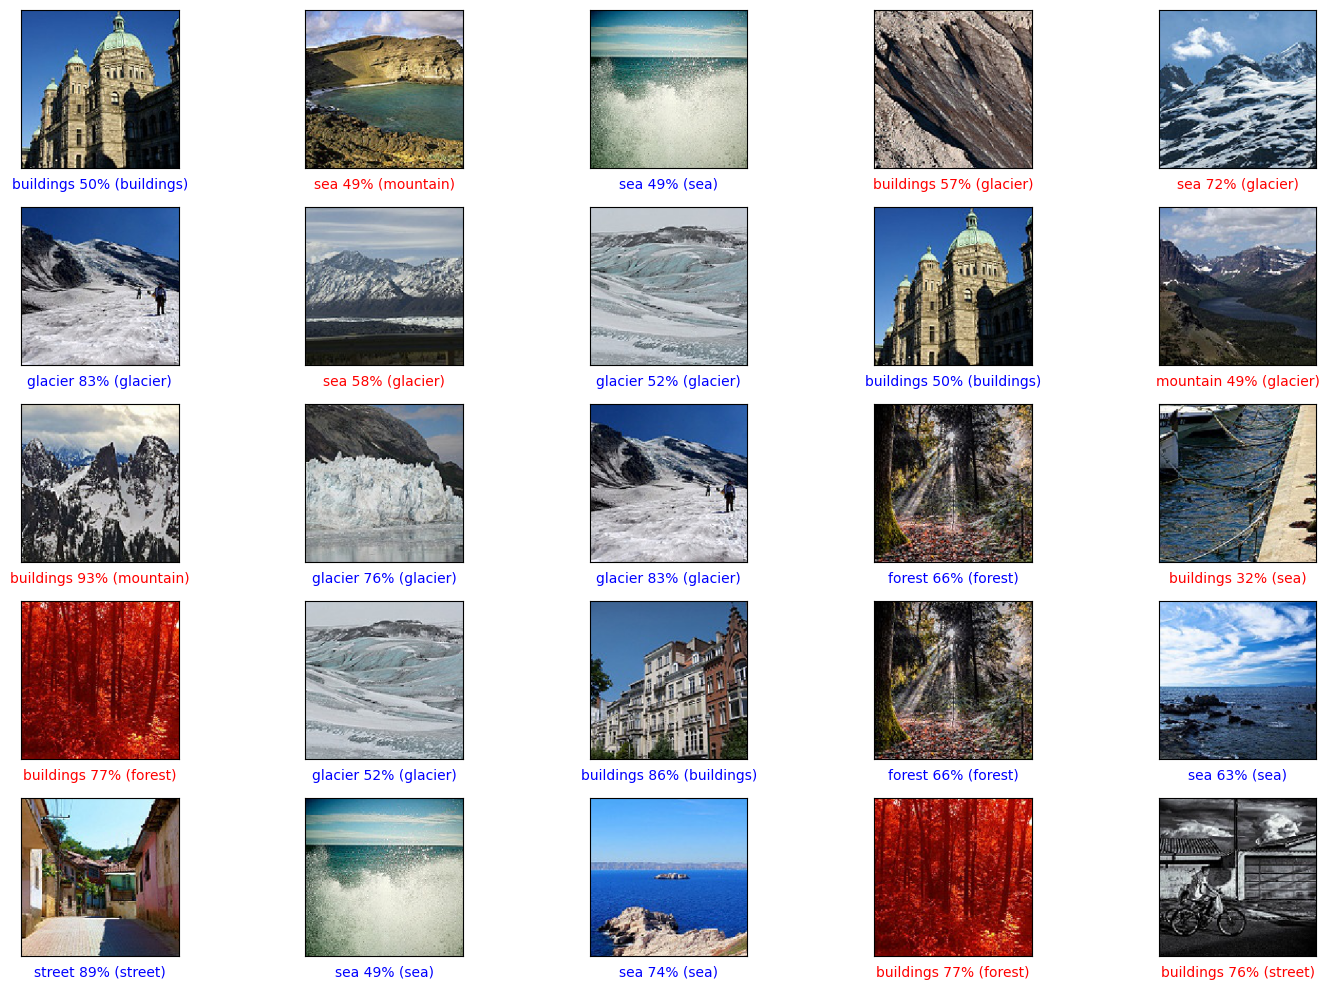

In [30]:
# In[26]:

def plot_image(i, predictions_array, true_label, img):
    true_label_idx = np.argmax(true_label[i])
    img = img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    predicted_label = np.argmax(predictions_array[i])
    if predicted_label == true_label_idx:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_labels[predicted_label],
                                    100*np.max(predictions_array[i]),
                                    class_labels[true_label_idx]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label_idx = np.argmax(true_label[i])
    plt.grid(False)
    plt.xticks(range(len(class_labels)))
    plt.yticks([])
    thisplot = plt.bar(range(len(class_labels)), predictions_array[i], color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array[i])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label_idx].set_color('blue')


# In[27]:

import random

# Generate predictions on the validation dataset
val_images, val_labels = val_data.next()
predictions = model.predict(val_images)

plt.figure(figsize=(15, 10))
for i in range(25):
    random_index = random.randint(0, len(val_images) - 1)

    plt.subplot(5, 5, i + 1)
    plot_image(random_index, predictions, val_labels, val_images)

plt.tight_layout()
plt.show()
